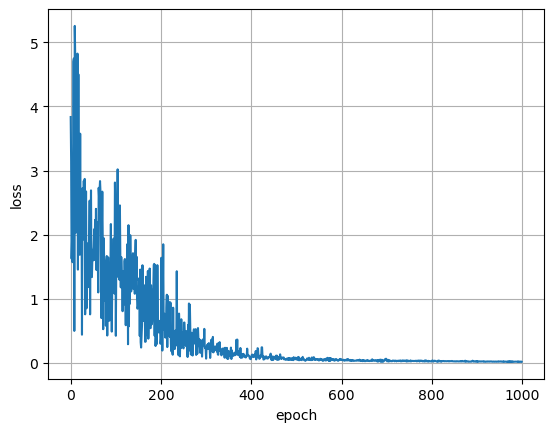

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#make Neural network
Nin = 3
M1 = 7
M2 = 8
W1 = np.random.random([M1,Nin])
b1 = np.random.random([M1,1])
W2 = np.random.random([M2, M1])
b2 = np.random.random([M2,1])
network = [W1,W2,b1,b2]

def relu(x):
    return np.maximum(0, x)

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def loss_function(y,t):
    #return sum(0.5*(y-t)**2)
    return -np.sum(t*np.log(y))

def forward(network, x):
    W1 = network[0]
    W2 = network[1]
    b1 = network[2]
    b2 = network[3]
    y1 = relu(W1@x  + b1)
    y2 = softmax(W2@y1 + b2)    
    return y2

#ランダムに入力を作る
def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([[x2],[x1],[x0]])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach

def numerical_deff(y1,y2,h):
    return (y2-y1)/2/h

def calc_grad(network):
    index=0
    for W in network:
        network1 = copy(network)
        raw, col = np.shape(W)
        grad=np.zeros([raw, col])
        for m in range(raw):
            for n in range(col):
                #W1 = network[0]
                Wn = np.copy(W)
                Wn[m,n] = W[m,n] - h
                network1 = [W1n,W2,b1,b2]
                out1 = forward(network1, x) 
                loss1 = loss_function(out1, teach)
                W1n[m,n] = W1[m,n] + h
                network1 = [W1n,W2,b1,b2]
                out2 = forward(network1, x) 
                loss2 = loss_function(out2, teach)
                #print(loss2,loss1)
                grad1[m, n] = numerical_deff(loss1, loss2, h)
        index+=1

COUNT=[]
LOSS=[]

h=1e-6;
rho = 0.1

#学習
for i in range(1000):
    x, teach = make_input()
    W1 = network[0]
    W2 = network[1]
    b1 = network[2]
    b2 = network[3]

    #数値偏微分
    grad1=np.zeros([M1, Nin])
    raw, col = np.shape(W1)
    for m in range(raw):
        for n in range(col):
            W1 = network[0]
            W1n = np.copy(W1)
            W1n[m,n] = W1[m,n] - h
            network1 = [W1n,W2,b1,b2]
            out1 = forward(network1, x) 
            loss1 = loss_function(out1, teach)
            W1n[m,n] = W1[m,n] + h
            network1 = [W1n,W2,b1,b2]
            out2 = forward(network1, x) 
            loss2 = loss_function(out2, teach)
            #print(loss2,loss1)
            grad1[m, n] = numerical_deff(loss1, loss2, h)

    grad2=np.zeros([M2, M1])
    for m in range(M2):
        for n in range(M1):
            W2 = network[1]
            W2n = np.copy(W2)
            W2n[m,n] = W2[m,n] - h
            network1 = [W1,W2n,b1,b2]
            out1 = forward(network1, x) 
            loss1 = loss_function(out1, teach)
            W2n[m,n] = W2n[m,n] + 2*h
            network1 = [W1,W2n,b1,b2]
            out2 = forward(network1, x) 
            loss2 = loss_function(out2, teach)
            #print(loss2,loss1)
            grad2[m, n] = numerical_deff(loss1, loss2, h)

    grad3=np.zeros([M1, 1])
    for m in range(M1):
        for n in range(1):
            b1 = network[2]
            b1n = np.copy(b1)
            b1n[m,n] = b1[m,n] - h
            network1 = [W1,W2,b1n,b2]
            out1 = forward(network1, x) 
            loss1 = loss_function(out1, teach)
            b1n[m,n] = b1n[m,n] + 2*h
            network1 = [W1,W2,b1n,b2]
            out2 = forward(network1, x) 
            loss2 = loss_function(out2, teach)
            #print(loss2,loss1)
            grad3[m, n] = numerical_deff(loss1, loss2, h)

    grad4=np.zeros([M2, 1])
    for m in range(M2):
        for n in range(1):
            b2 = network[3]
            b2n = np.copy(b2)
            b2n[m,n] = b2[m,n] - h
            network1 = [W1,W2,b1,b2n]
            out1 = forward(network1, x) 
            loss1 = loss_function(out1, teach)
            b2n[m,n] = b2n[m,n] + 2*h
            network1 = [W1,W2,b1,b2n]
            out2 = forward(network1, x) 
            loss2 = loss_function(out2, teach)
            #print(loss2,loss1)
            grad4[m, n] = numerical_deff(loss1, loss2, h)

    #重み更新
    W1 = W1 - rho*grad1
    W2 = W2 - rho*grad2
    b1 = b1 - rho*grad3
    b2 = b2 - rho*grad4


    x, teach = make_input()
    network = [W1,W2,b1,b2]
    out = forward(network, x) 
    loss = loss_function(out, teach)
    COUNT.append(i)
    LOSS.append(loss)
    
plt.plot(COUNT, LOSS)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()
    


In [24]:
#学習後のニューラルネットで確認
x, teach = make_input()
network = [W1,W2,b1,b2]
out = forward(network, x)

print("input", x[2]+x[1]*2+x[0]*4)
print("output\n", np.round(out))

input [6]
output
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [25]:
W1

array([[-0.93725985,  1.58628492,  0.39473726],
       [ 1.9864348 ,  0.82357594, -0.25554389],
       [ 0.78014486,  3.07290504, -0.12021736],
       [-0.00697741, -0.00893542,  3.80847547],
       [-1.1587928 ,  1.08836066,  0.80222666],
       [ 2.8985936 , -1.35159089,  0.22248678],
       [ 0.96878427,  0.24260191,  0.97719889]])

In [28]:
m,n=np.shape(W1)

In [29]:
m

7

In [30]:
n

3

In [35]:
for w in network:
    print(w)
    print()

[[ 4.39611049e-01  3.50753162e+00 -3.43682093e-01]
 [ 3.09114748e-03 -2.97424424e-03  3.51609226e+00]
 [ 2.03126195e+00  1.61878470e-01  1.66327183e-01]
 [ 3.05071946e+00 -4.30327635e-01 -7.88881663e-02]
 [ 4.15037315e-01  1.06885635e+00  4.19104355e-01]
 [-3.97923305e-01  1.20837906e+00  1.45273025e+00]
 [-1.05992369e+00  4.35792172e-01 -2.53400584e-01]]

[[-0.78329761 -0.76269328  0.32817788  0.05935312  0.40895792  0.09402467
   2.43705773]
 [-1.23280343  2.30476939 -0.45181707 -0.22227195 -0.18076379  1.32912295
   0.70402697]
 [ 2.16787516 -0.55575713 -0.55470753 -0.336333    0.45755786  0.58288485
   1.24838585]
 [ 1.23286044  1.64270662  0.15056919 -1.35452823  1.08893255  1.47951431
   0.50906888]
 [-0.19442288 -0.65223932  1.405895    2.5353248  -0.10844163 -0.73839942
   0.10520576]
 [-0.87886739  1.95655217  1.38215789  1.48071785  0.44690785 -0.00324172
  -0.26007722]
 [ 2.11171352 -1.00025034  1.32824513  1.27108096  1.00779423 -0.05168632
  -0.081917  ]
 [ 1.39776029  1.2

In [37]:
a=[1,2,3]

In [38]:
b=a

In [39]:
b

[1, 2, 3]

In [41]:
b[1]=0

In [42]:
b

[1, 0, 3]

In [43]:
a

[1, 0, 3]